In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Import Cancer data from the Sklearn library
# Dataset can also be found here (http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
df_cancer.shape

(569, 31)

In [6]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

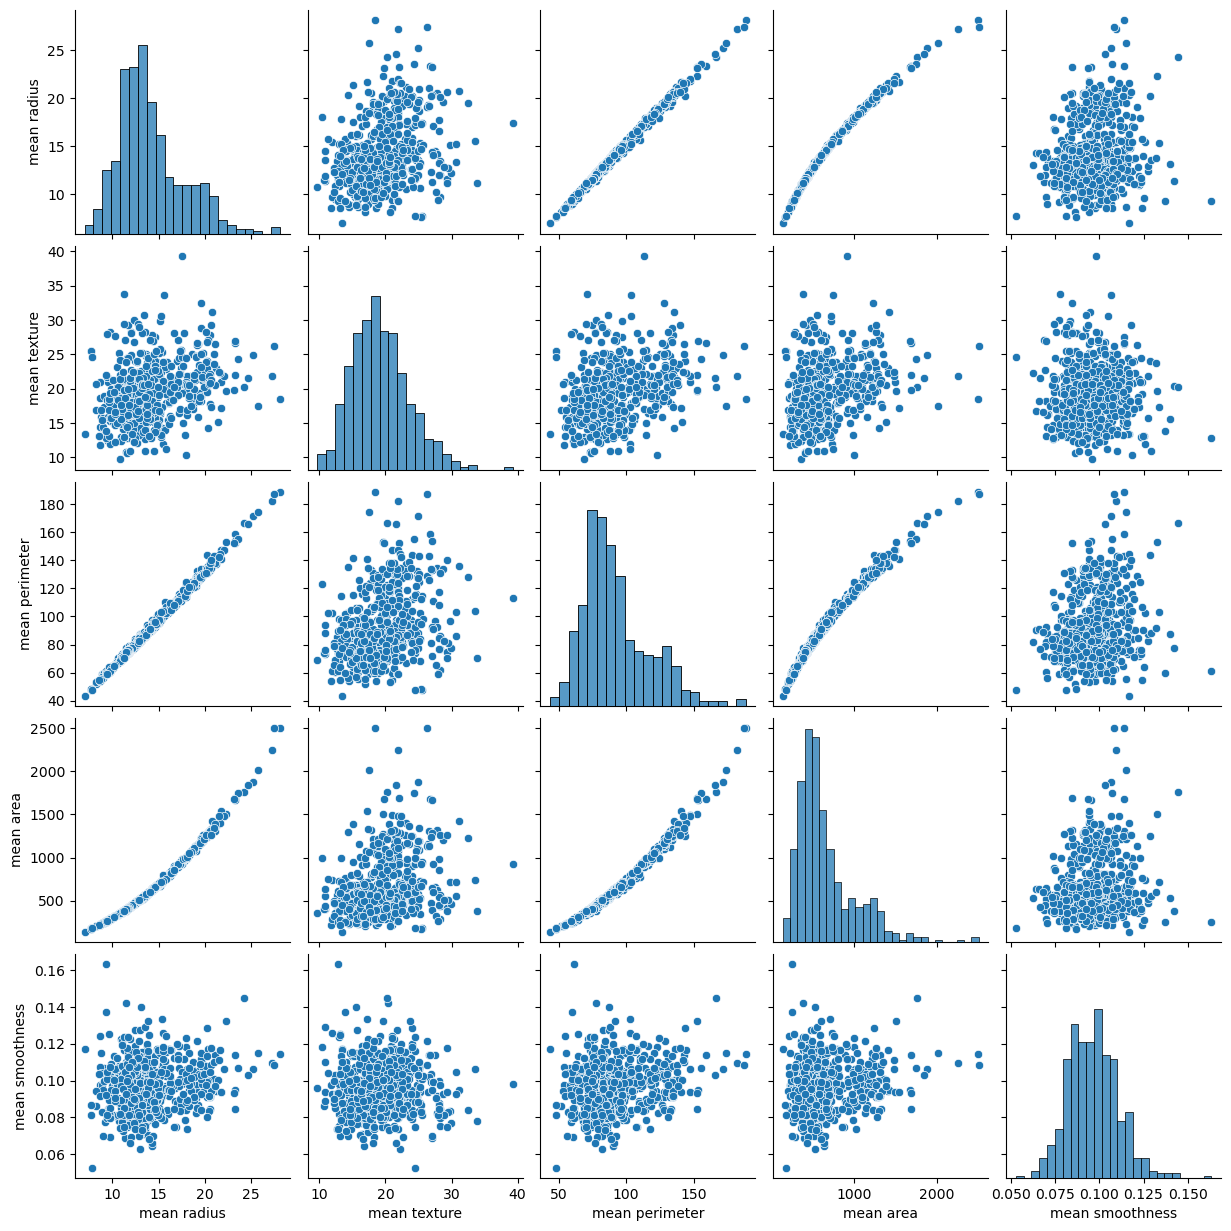

In [7]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'] )

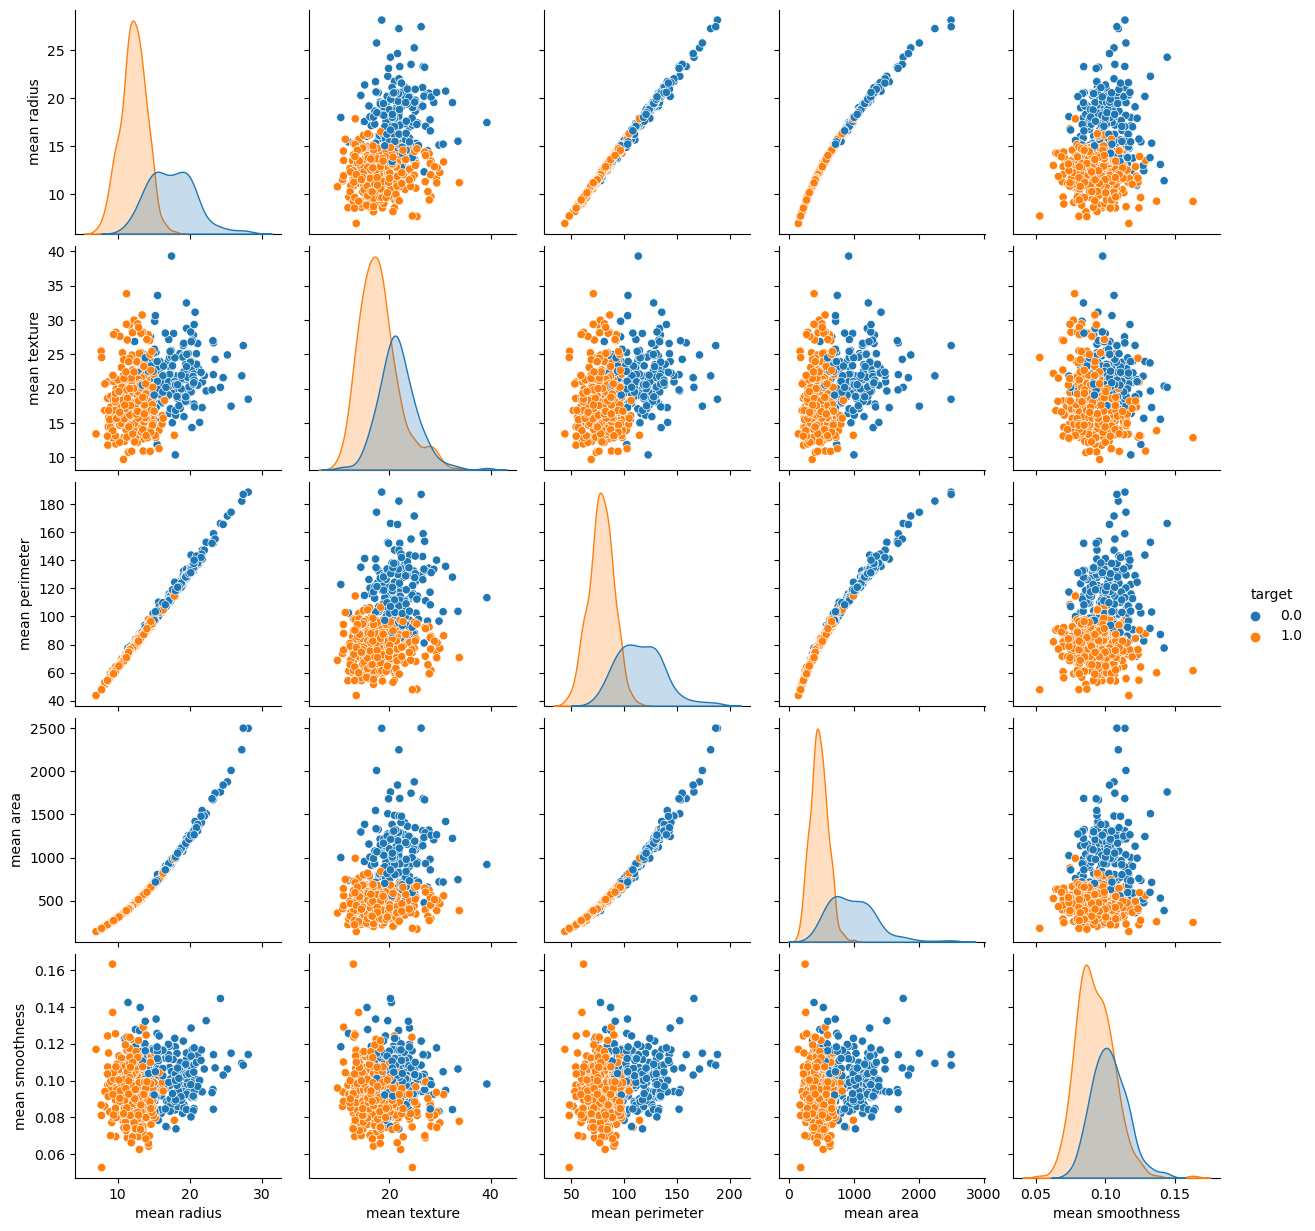

In [8]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

In [9]:
df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

<AxesSubplot: ylabel='count'>

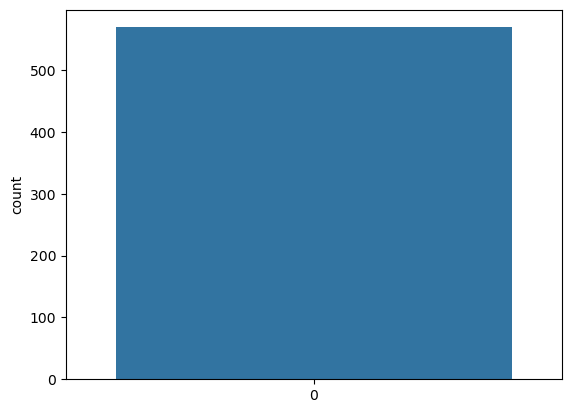

In [10]:
sns.countplot(df_cancer['target'], label = "Count") 

<AxesSubplot: >

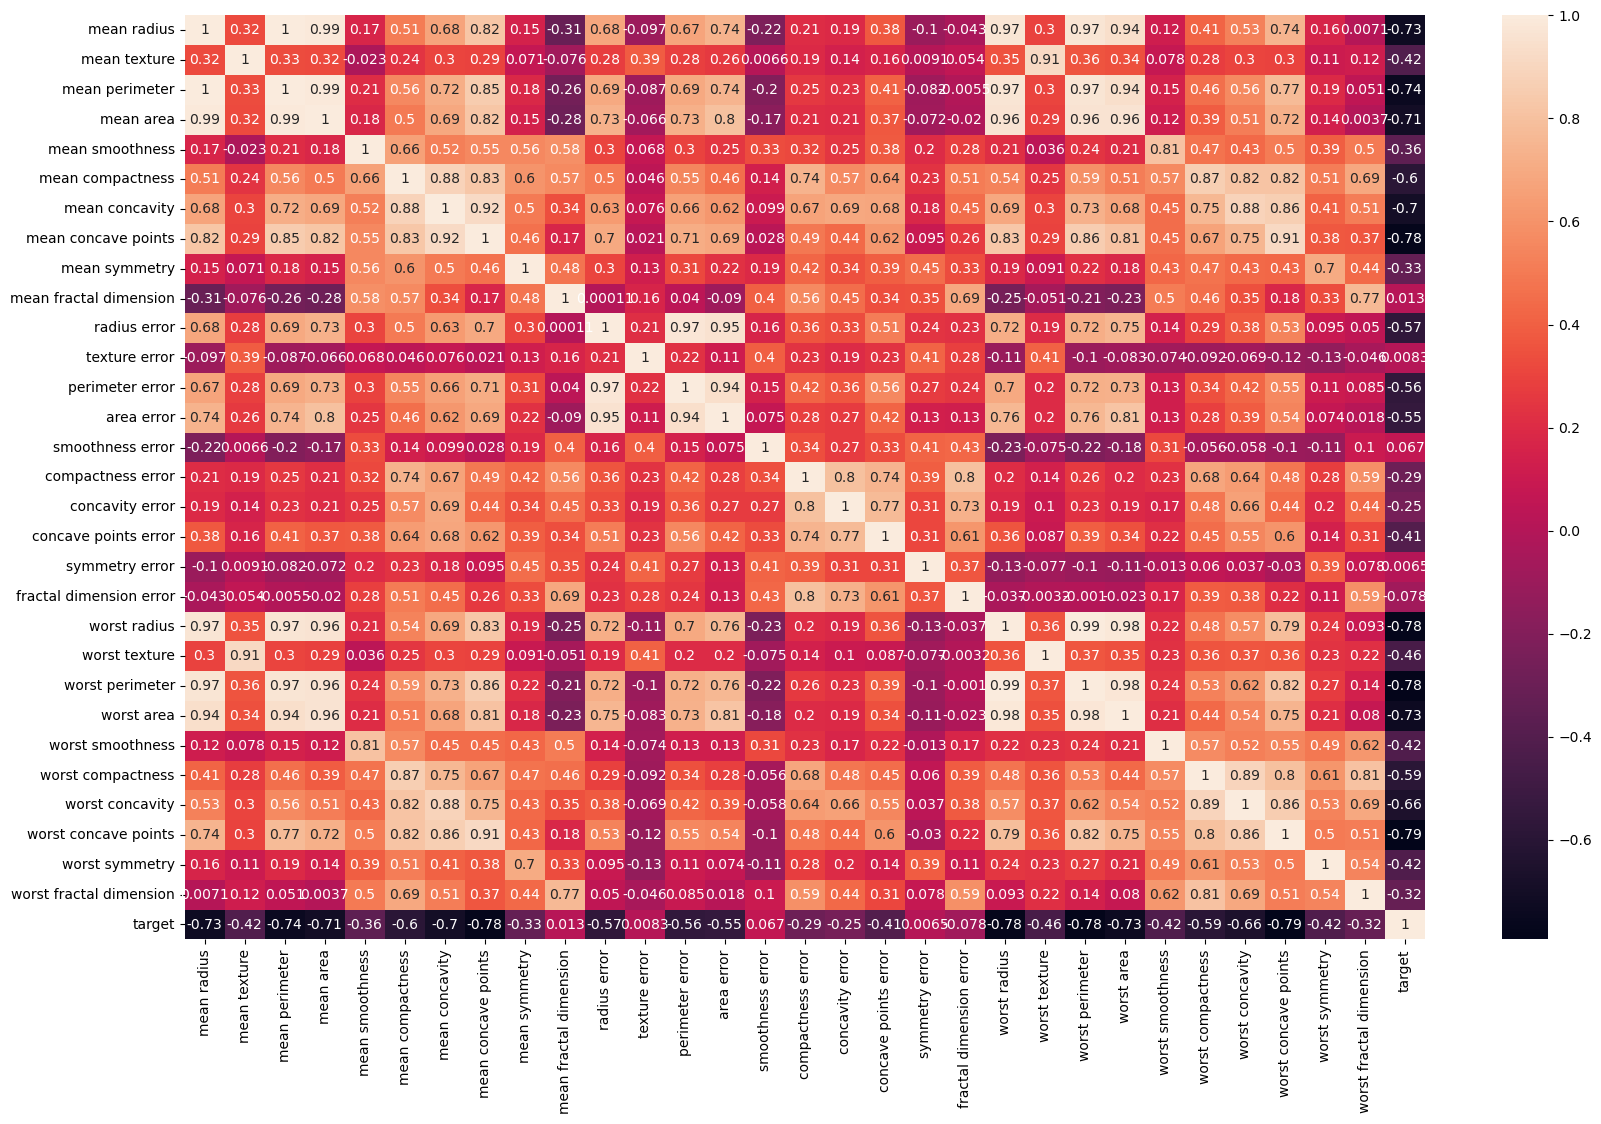

In [11]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df_cancer.corr(), annot=True) 

In [12]:
X = df_cancer.drop(['target'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [16]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (455, 30)


The size of our testing "X" (input features) is (114, 30)


The size of our training "y" (output feature) is (455,)


The size of our testing "y" (output features) is (114,)


In [17]:
from sklearn.svm import SVC


In [18]:
svc_model = SVC()

In [19]:
svc_model.fit(X_train, y_train)

SVC()

In [20]:
y_predict = svc_model.predict(X_test)

In [21]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix

In [22]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,8,40


<AxesSubplot: >

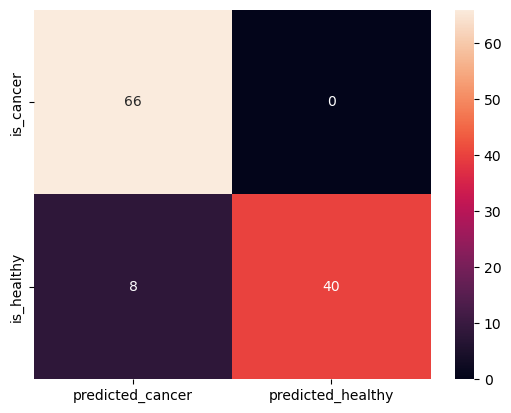

In [23]:
sns.heatmap(confusion, annot=True)

In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        48
         1.0       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



In [25]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [26]:
X_train_max = X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [27]:
X_train_range = (X_train_max- X_train_min)
X_train_range

mean radius                  21.129000
mean texture                 28.900000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.092070
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.043000
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.050000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [28]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
412,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,...,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
461,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,...,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
532,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,...,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
495,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,...,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
13,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,...,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358


In [29]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [30]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [31]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

In [32]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,61,5
is_healthy,0,48


<AxesSubplot: >

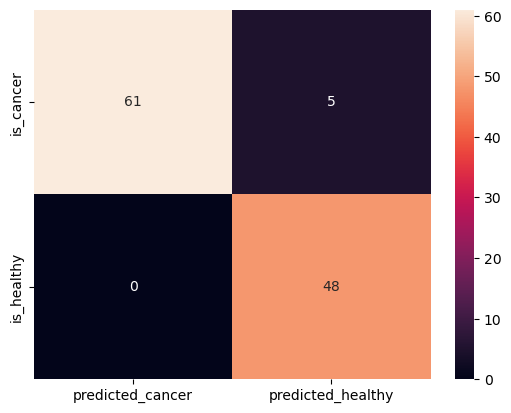

In [33]:
sns.heatmap(confusion,annot=True,fmt="d")

In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        48
         1.0       1.00      0.92      0.96        66

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [35]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [38]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [39]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=10, gamma=0.1)


In [40]:
grid_predictions = grid.predict(X_test_scaled)

In [41]:
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,63,3
is_healthy,0,48


<AxesSubplot: >

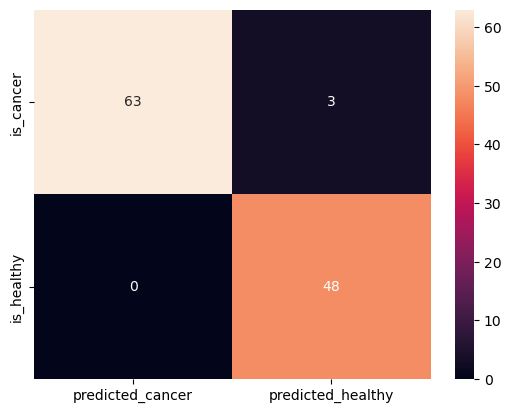

In [42]:
sns.heatmap(confusion, annot=True)

In [43]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        48
         1.0       1.00      0.95      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



# Randm Forest

In [163]:
import pandas as pd
import numpy as np
from sklearn import datasets
#
# Load the breast cancer data set
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

In [164]:
from sklearn.model_selection import train_test_split
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

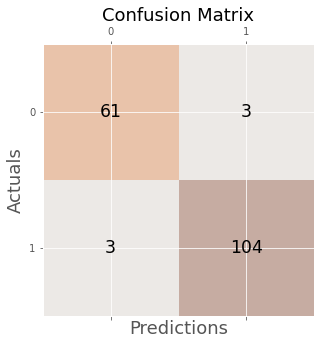

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large') 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [167]:
print('Precision: %.3f' % precision_score(y_test, y_pred))


Precision: 0.972


In [168]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.972


In [169]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.965


In [170]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))


F1 Score: 0.972


# AdaBoost Classifier

In [172]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [173]:
cancer = datasets.load_breast_cancer()
print("Features:", cancer.feature_names)
print("Labels:", cancer.target_names)
print(cancer.data.shape)


Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels: ['malignant' 'benign']
(569, 30)


In [174]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [175]:
print("##############################################################")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Kappa Stats:",metrics.cohen_kappa_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred))
print("F-Measure:",metrics.recall_score(y_test, y_pred))
print("##############################################################")

##############################################################
Accuracy: 0.9766081871345029
Kappa Stats: 0.9490388913723737
Precision: 0.972972972972973
Recall: 0.9908256880733946
Mean Absolute Error: 0.023391812865497075
Mean Squared Error: 0.023391812865497075
F-Measure: 0.9908256880733946
##############################################################


# KNN classifier

In [193]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt #matplotlib is used for plot the graphs,
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, model_selection, neighbors

In [194]:
df=pd.read_csv("C:/Users/Syed Muqtasid Ali/Downloads/NEU_Dataset.csv")
df.head()

,diagnostics_Image-original_Mean,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,wavelet-H_firstorder_10Percentile,wavelet-H_firstorder_90Percentile,wavelet-H_firstorder_Energy,wavelet-H_firstorder_Entropy,wavelet-H_firstorder_InterquartileRange,wavelet-H_firstorder_Kurtosis,wavelet-H_firstorder_Maximum,wavelet-H_firstorder_MeanAbsoluteDeviation,wavelet-H_firstorder_Mean,wavelet-H_firstorder_Median,wavelet-H_firstorder_Minimum,wavelet-H_firstorder_Range,wavelet-H_firstorder_RobustMeanAbsoluteDeviation,wavelet-H_firstorder_RootMeanSquared,wavelet-H_firstorder_Skewness,wavelet-H_firstorder_TotalEnergy,wavelet-H_firstorder_Uniformity,wavelet-H_firstorder_Variance,wavelet-H_glcm_Autocorrelation,wavelet-H_glcm_ClusterProminence,wavelet-H_glcm_ClusterShade,wavelet-H_glcm_ClusterTendency,wavelet-H_glcm_Contrast,wavelet-H_glcm_Correlation,wavelet-H_glcm_DifferenceAverage,wavelet-H_glcm_DifferenceEntropy,wavelet-H_glcm_DifferenceVariance,wavelet-H_glcm_Id,wavelet-H_glcm_Idm,wavelet-H_glcm_Idmn,wavelet-H_glcm_Idn,wavelet-H_glcm_Imc1,wavelet-H_glcm_Imc2,wavelet-H_glcm_InverseVariance,wavelet-H_glcm_JointAverage,wavelet-H_glcm_JointEnergy,wavelet-H_glcm_JointEntropy,wavelet-H_glcm_MCC,wavelet-H_glcm_MaximumProbability,wavelet-H_glcm_SumAverage,wavelet-H_glcm_SumEntropy,wavelet-H_glcm_SumSquares,wavelet-H_glrlm_GrayLevelNonUniformity,wavelet-H_glrlm_GrayLevelNonUniformityNormalized,wavelet-H_glrlm_GrayLevelVariance,wavelet-H_glrlm_HighGrayLevelRunEmphasis,wavelet-H_glrlm_LongRunEmphasis,wavelet-H_glrlm_LongRunHighGrayLevelEmphasis,wavelet-H_glrlm_LongRunLowGrayLevelEmphasis,wavelet-H_glrlm_LowGrayLevelRunEmphasis,wavelet-H_glrlm_RunEntropy,wavelet-H_glrlm_RunLengthNonUniformity,wavelet-H_glrlm_RunLengthNonUniformityNormalized,wavelet-H_glrlm_RunPercentage,wavelet-H_glrlm_RunVariance,wavelet-H_glrlm_ShortRunEmphasis,wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis,wavelet-H_glrlm_ShortRunLowGrayLevelEmphasis,wavelet-H_glszm_GrayLevelNonUniformity,wavelet-H_glszm_GrayLevelNonUniformityNormalized,wavelet-H_glszm_GrayLevelVariance,wavelet-H_glszm_HighGrayLevelZoneEmphasis,wavelet-H_glszm_LargeAreaEmphasis,wavelet-H_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-H_glszm_LargeAreaLowGrayLevelEmphasis,wavelet-H_glszm_LowGrayLevelZoneEmphasis,wavelet-H_glszm_SizeZoneNonUniformity,wavelet-H_glszm_SizeZoneNonUniformityNormalized,wavelet-H_glszm_SmallAreaEmphasis,wavelet-H_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-H_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-H_glszm_ZoneEntropy,wavelet-H_glszm_ZonePercentage,wavelet-H_glszm_ZoneVariance,wavelet-H_gldm_DependenceEntropy,wavelet-H_gldm_DependenceNonUniformity,wavelet-H_gldm_DependenceNonUniformityNormalized,wavelet-H_gldm_DependenceVariance,wavelet-H_gldm_GrayLevelNonUniformity,wavelet-H_gldm_GrayLevelVariance,wavelet-H_gldm_HighGrayLevelEmphasis,wavelet-H_gldm_LargeDependenceEmphasis,wavelet-H_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-H_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-H_gldm_LowGrayLevelEmphasis,wavelet-H_gldm_SmallDependenceEmphasis,wavelet-H_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-H_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-L_firstorder_10Percentile,wavelet-L_firstorder_90Percentile,wavelet-L_firstorder_Energy,wavelet-L_firstorder_Entropy,wavelet-L_firstorder_InterquartileRange,wavelet-L_firstorder_Kurtosis,wavelet-L_firstorder_Maximum,wavelet-L_firstorder_MeanAbsoluteDeviation,wavelet-L_firstorder_Mean,wavelet-L_firstorder_Median,wavelet-L_firstorder_Minimum,wavelet-L_firstorder_Range,wavelet-L_firstorder_RobustMeanAbsoluteDeviation,wavelet-L_firstorder_RootMeanSquared,wavelet-L_firstorder_Skewness,wavelet-L_firstorder_TotalEnergy,wavelet-L_firstorder_Uniformity,wavelet-L_firstorder_Variance,wavelet-L_glcm_Autocorrelation,wavelet-

In [199]:
df['diagnostics'].value_counts()

B    600
M    312
Name: diagnostics, dtype: int64

C:\Users\Syed Muqtasid Ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnostics', ylabel='count'>

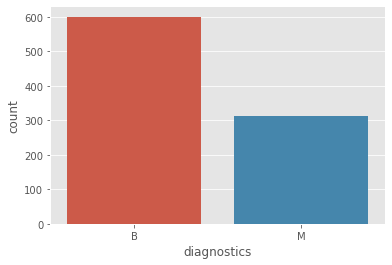

In [200]:
sns.countplot(df['diagnostics'])

In [201]:
from sklearn.preprocessing import LabelEncoder

In [202]:
df.iloc[:,0:5].corr()

,diagnostics_Image-original_Mean,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface
diagnostics_Image-original_Mean,1.000000,-0.045024,0.113275,0.116547,0.123593
original_shape2D_Elongation,-0.045024,1.000000,-0.174947,-0.142081,0.076218
original_shape2D_MajorAxisLength,0.113275,-0.174947,1.000000,0.987825,0.858613
original_shape2D_MaximumDiameter,0.116547,-0.142081,0.987825,1.000000,0.883983
original_shape2D_MeshSurface,0.123593,0.076218,0.858613,0.883983,1.000000


<AxesSubplot:>

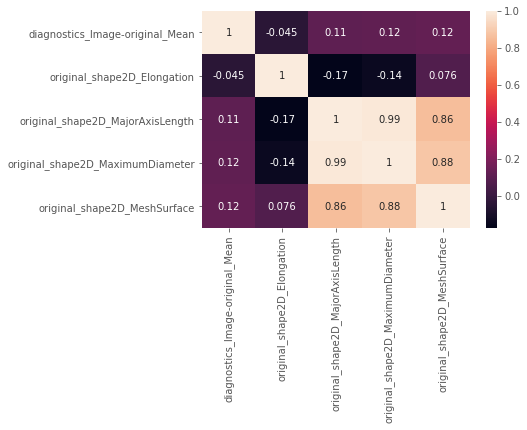

In [203]:
sns.heatmap(df.iloc[:,0:5].corr(), annot=True)

In [204]:
X = df.iloc[:,1:31].values
Y = df.iloc[:,0].values

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target, random_state=42)

In [209]:
knn = KNeighborsClassifier()

In [210]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [211]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(n_jobs=1)

In [212]:
knn.score(X_train, Y_train)

0.9342723004694836

In [213]:
knn.score(X_test, Y_test)

0.965034965034965

# XGBoost

In [283]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from xgboost import XGBClassifier
import xgboost as xgb


In [284]:
np_data = pd.read_csv('C:/Users/Syed Muqtasid Ali/Downloads/NEU_Dataset.csv')
np_data.head(10)

,diagnostics_Image-original_Mean,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,wavelet-H_firstorder_10Percentile,wavelet-H_firstorder_90Percentile,wavelet-H_firstorder_Energy,wavelet-H_firstorder_Entropy,wavelet-H_firstorder_InterquartileRange,wavelet-H_firstorder_Kurtosis,wavelet-H_firstorder_Maximum,wavelet-H_firstorder_MeanAbsoluteDeviation,wavelet-H_firstorder_Mean,wavelet-H_firstorder_Median,wavelet-H_firstorder_Minimum,wavelet-H_firstorder_Range,wavelet-H_firstorder_RobustMeanAbsoluteDeviation,wavelet-H_firstorder_RootMeanSquared,wavelet-H_firstorder_Skewness,wavelet-H_firstorder_TotalEnergy,wavelet-H_firstorder_Uniformity,wavelet-H_firstorder_Variance,wavelet-H_glcm_Autocorrelation,wavelet-H_glcm_ClusterProminence,wavelet-H_glcm_ClusterShade,wavelet-H_glcm_ClusterTendency,wavelet-H_glcm_Contrast,wavelet-H_glcm_Correlation,wavelet-H_glcm_DifferenceAverage,wavelet-H_glcm_DifferenceEntropy,wavelet-H_glcm_DifferenceVariance,wavelet-H_glcm_Id,wavelet-H_glcm_Idm,wavelet-H_glcm_Idmn,wavelet-H_glcm_Idn,wavelet-H_glcm_Imc1,wavelet-H_glcm_Imc2,wavelet-H_glcm_InverseVariance,wavelet-H_glcm_JointAverage,wavelet-H_glcm_JointEnergy,wavelet-H_glcm_JointEntropy,wavelet-H_glcm_MCC,wavelet-H_glcm_MaximumProbability,wavelet-H_glcm_SumAverage,wavelet-H_glcm_SumEntropy,wavelet-H_glcm_SumSquares,wavelet-H_glrlm_GrayLevelNonUniformity,wavelet-H_glrlm_GrayLevelNonUniformityNormalized,wavelet-H_glrlm_GrayLevelVariance,wavelet-H_glrlm_HighGrayLevelRunEmphasis,wavelet-H_glrlm_LongRunEmphasis,wavelet-H_glrlm_LongRunHighGrayLevelEmphasis,wavelet-H_glrlm_LongRunLowGrayLevelEmphasis,wavelet-H_glrlm_LowGrayLevelRunEmphasis,wavelet-H_glrlm_RunEntropy,wavelet-H_glrlm_RunLengthNonUniformity,wavelet-H_glrlm_RunLengthNonUniformityNormalized,wavelet-H_glrlm_RunPercentage,wavelet-H_glrlm_RunVariance,wavelet-H_glrlm_ShortRunEmphasis,wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis,wavelet-H_glrlm_ShortRunLowGrayLevelEmphasis,wavelet-H_glszm_GrayLevelNonUniformity,wavelet-H_glszm_GrayLevelNonUniformityNormalized,wavelet-H_glszm_GrayLevelVariance,wavelet-H_glszm_HighGrayLevelZoneEmphasis,wavelet-H_glszm_LargeAreaEmphasis,wavelet-H_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-H_glszm_LargeAreaLowGrayLevelEmphasis,wavelet-H_glszm_LowGrayLevelZoneEmphasis,wavelet-H_glszm_SizeZoneNonUniformity,wavelet-H_glszm_SizeZoneNonUniformityNormalized,wavelet-H_glszm_SmallAreaEmphasis,wavelet-H_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-H_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-H_glszm_ZoneEntropy,wavelet-H_glszm_ZonePercentage,wavelet-H_glszm_ZoneVariance,wavelet-H_gldm_DependenceEntropy,wavelet-H_gldm_DependenceNonUniformity,wavelet-H_gldm_DependenceNonUniformityNormalized,wavelet-H_gldm_DependenceVariance,wavelet-H_gldm_GrayLevelNonUniformity,wavelet-H_gldm_GrayLevelVariance,wavelet-H_gldm_HighGrayLevelEmphasis,wavelet-H_gldm_LargeDependenceEmphasis,wavelet-H_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-H_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-H_gldm_LowGrayLevelEmphasis,wavelet-H_gldm_SmallDependenceEmphasis,wavelet-H_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-H_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-L_firstorder_10Percentile,wavelet-L_firstorder_90Percentile,wavelet-L_firstorder_Energy,wavelet-L_firstorder_Entropy,wavelet-L_firstorder_InterquartileRange,wavelet-L_firstorder_Kurtosis,wavelet-L_firstorder_Maximum,wavelet-L_firstorder_MeanAbsoluteDeviation,wavelet-L_firstorder_Mean,wavelet-L_firstorder_Median,wavelet-L_firstorder_Minimum,wavelet-L_firstorder_Range,wavelet-L_firstorder_RobustMeanAbsoluteDeviation,wavelet-L_firstorder_RootMeanSquared,wavelet-L_firstorder_Skewness,wavelet-L_firstorder_TotalEnergy,wavelet-L_firstorder_Uniformity,wavelet-L_firstorder_Variance,wavelet-L_glcm_Autocorrelation,wavelet-

In [285]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

In [286]:
# X, y = load_wine(return_X_y=True, as_frame=True)

In [287]:
X.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
18,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0
147,12.87,4.61,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0


In [288]:
y.sample(5)

109    1
170    2
163    2
6      0
106    1
Name: target, dtype: int32

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [290]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [291]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [292]:
y_pred = model.predict(X_test)

In [293]:
print(y_pred)

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 0 1 0 0 1 2 0 0 0 1 0 0 0 1 2 2 0]


In [294]:
accuracy = accuracy_score(y_test, y_pred)

In [295]:
print(accuracy)

0.9629629629629629


# Bagging Classifier

In [297]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [298]:
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [300]:
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

In [301]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

In [302]:
print('Model test Score: %.3f, ' %pipeline.score(X_test, y_test),
      'Model training Score: %.3f' %pipeline.score(X_train, y_train))

Model test Score: 0.965,  Model training Score: 0.991


In [303]:
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

In [304]:
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)

In [305]:
bgclassifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('logisticregression',
                                                  LogisticRegression(random_state=1))]),
                  max_features=10, max_samples=100, n_estimators=100, n_jobs=5,
                  random_state=1)

In [306]:
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

Model test Score: 0.958,  Model training Score: 0.972


# ANN classifier

In [403]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [404]:
df = pd.read_csv('C:/Users/Syed Muqtasid Ali/Downloads/NEU_Dataset.csv') 
print(df.shape)
df.describe().transpose()

(912, 187)


,count,mean,std,min,25%,50%,75%,max
diagnostics_Image-original_Mean,912.0,70.593831,26.034430,13.771748,49.974242,70.468769,86.546557,154.618290
original_shape2D_Elongation,912.0,0.675122,0.143308,0.273865,0.576807,0.679517,0.780295,0.988225
original_shape2D_MajorAxisLength,912.0,272.250814,134.949565,52.932011,163.552971,251.038696,352.867379,717.190437
original_shape2D_MaximumDiameter,912.0,207.336407,102.420144,37.947332,124.871857,189.827548,270.338673,607.000824
original_shape2D_MeshSurface,912.0,81.483004,44.973800,9.000000,47.375000,74.000000,106.000000,302.500000
...,...,...,...,...,...,...,...,...
wavelet-L_gldm_LargeDependenceLowGrayLevelEmphasis,912.0,0.057262,0.146411,0.005134,0.017523,0.026535,0.044321,1.961927
wavelet-L_gldm_LowGrayLevelEmphasis,912.0,0.036494,0.051431,0.004833,0.015742,0.023861,0.036669,0.611714
wavelet-L_gldm_SmallDependenceEmphasis,912.0,0.937664,0.045382,0.678431,0.918380,0.944297,0.967033,1.000000
wavelet-L_gldm_SmallDependenceHighGrayLevelEmphasis,912.0,450.496372,248.680936,24.666667,275.375390,413.001131,569.099042,2024.301971


In [415]:
%tensorflow_version 2.0.0
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

UsageError: Line magic function `%tensorflow_version` not found.


In [416]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [417]:
X=pd.DataFrame(cancer.data,columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [418]:
y=pd.DataFrame(cancer.target,columns=['target'])
y['target'].unique()

array([0, 1])

In [419]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [420]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [421]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((455, 30), (455, 1), (114, 30), (114, 1))

In [422]:
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import Sequential

In [423]:
model=Sequential()
model.add(Dense(50,activation='relu',input_shape=X_train.shape))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [424]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [425]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 455, 50)           1550      
_________________________________________________________________
dropout (Dropout)            (None, 455, 50)           0         
_________________________________________________________________
dense_17 (Dense)             (None, 455, 50)           2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 455, 50)           0         
_________________________________________________________________
dense_18 (Dense)             (None, 455, 50)           2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 455, 50)           0         
_________________________________________________________________
dense_19 (Dense)             (None, 455, 1)           

In [426]:
history=model.fit(X_train,y_train,batch_size=10,epochs=50,validation_split=0.1)

Epoch 1/50
41/41 [==============================] - 1s 14ms/step - loss: 0.6393 - accuracy: 0.6748 - val_loss: 0.4456 - val_accuracy: 0.8696
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4361 - accuracy: 0.8142 - val_loss: 0.3069 - val_accuracy: 0.8696
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.8411 - val_loss: 0.2295 - val_accuracy: 0.8478
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.2530 - accuracy: 0.9095 - val_loss: 0.2004 - val_accuracy: 0.8696
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.2009 - accuracy: 0.9193 - val_loss: 0.1914 - val_accuracy: 0.8913
Epoch 6/50
41/41 [==============================] - 0s 3ms/step - loss: 0.1594 - accuracy: 0.9462 - val_loss: 0.1754 - val_accuracy: 0.8913
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9560 - val_loss: 0.1748 - val_accuracy: 0.8913
Epoch 8/50
41/41 [=

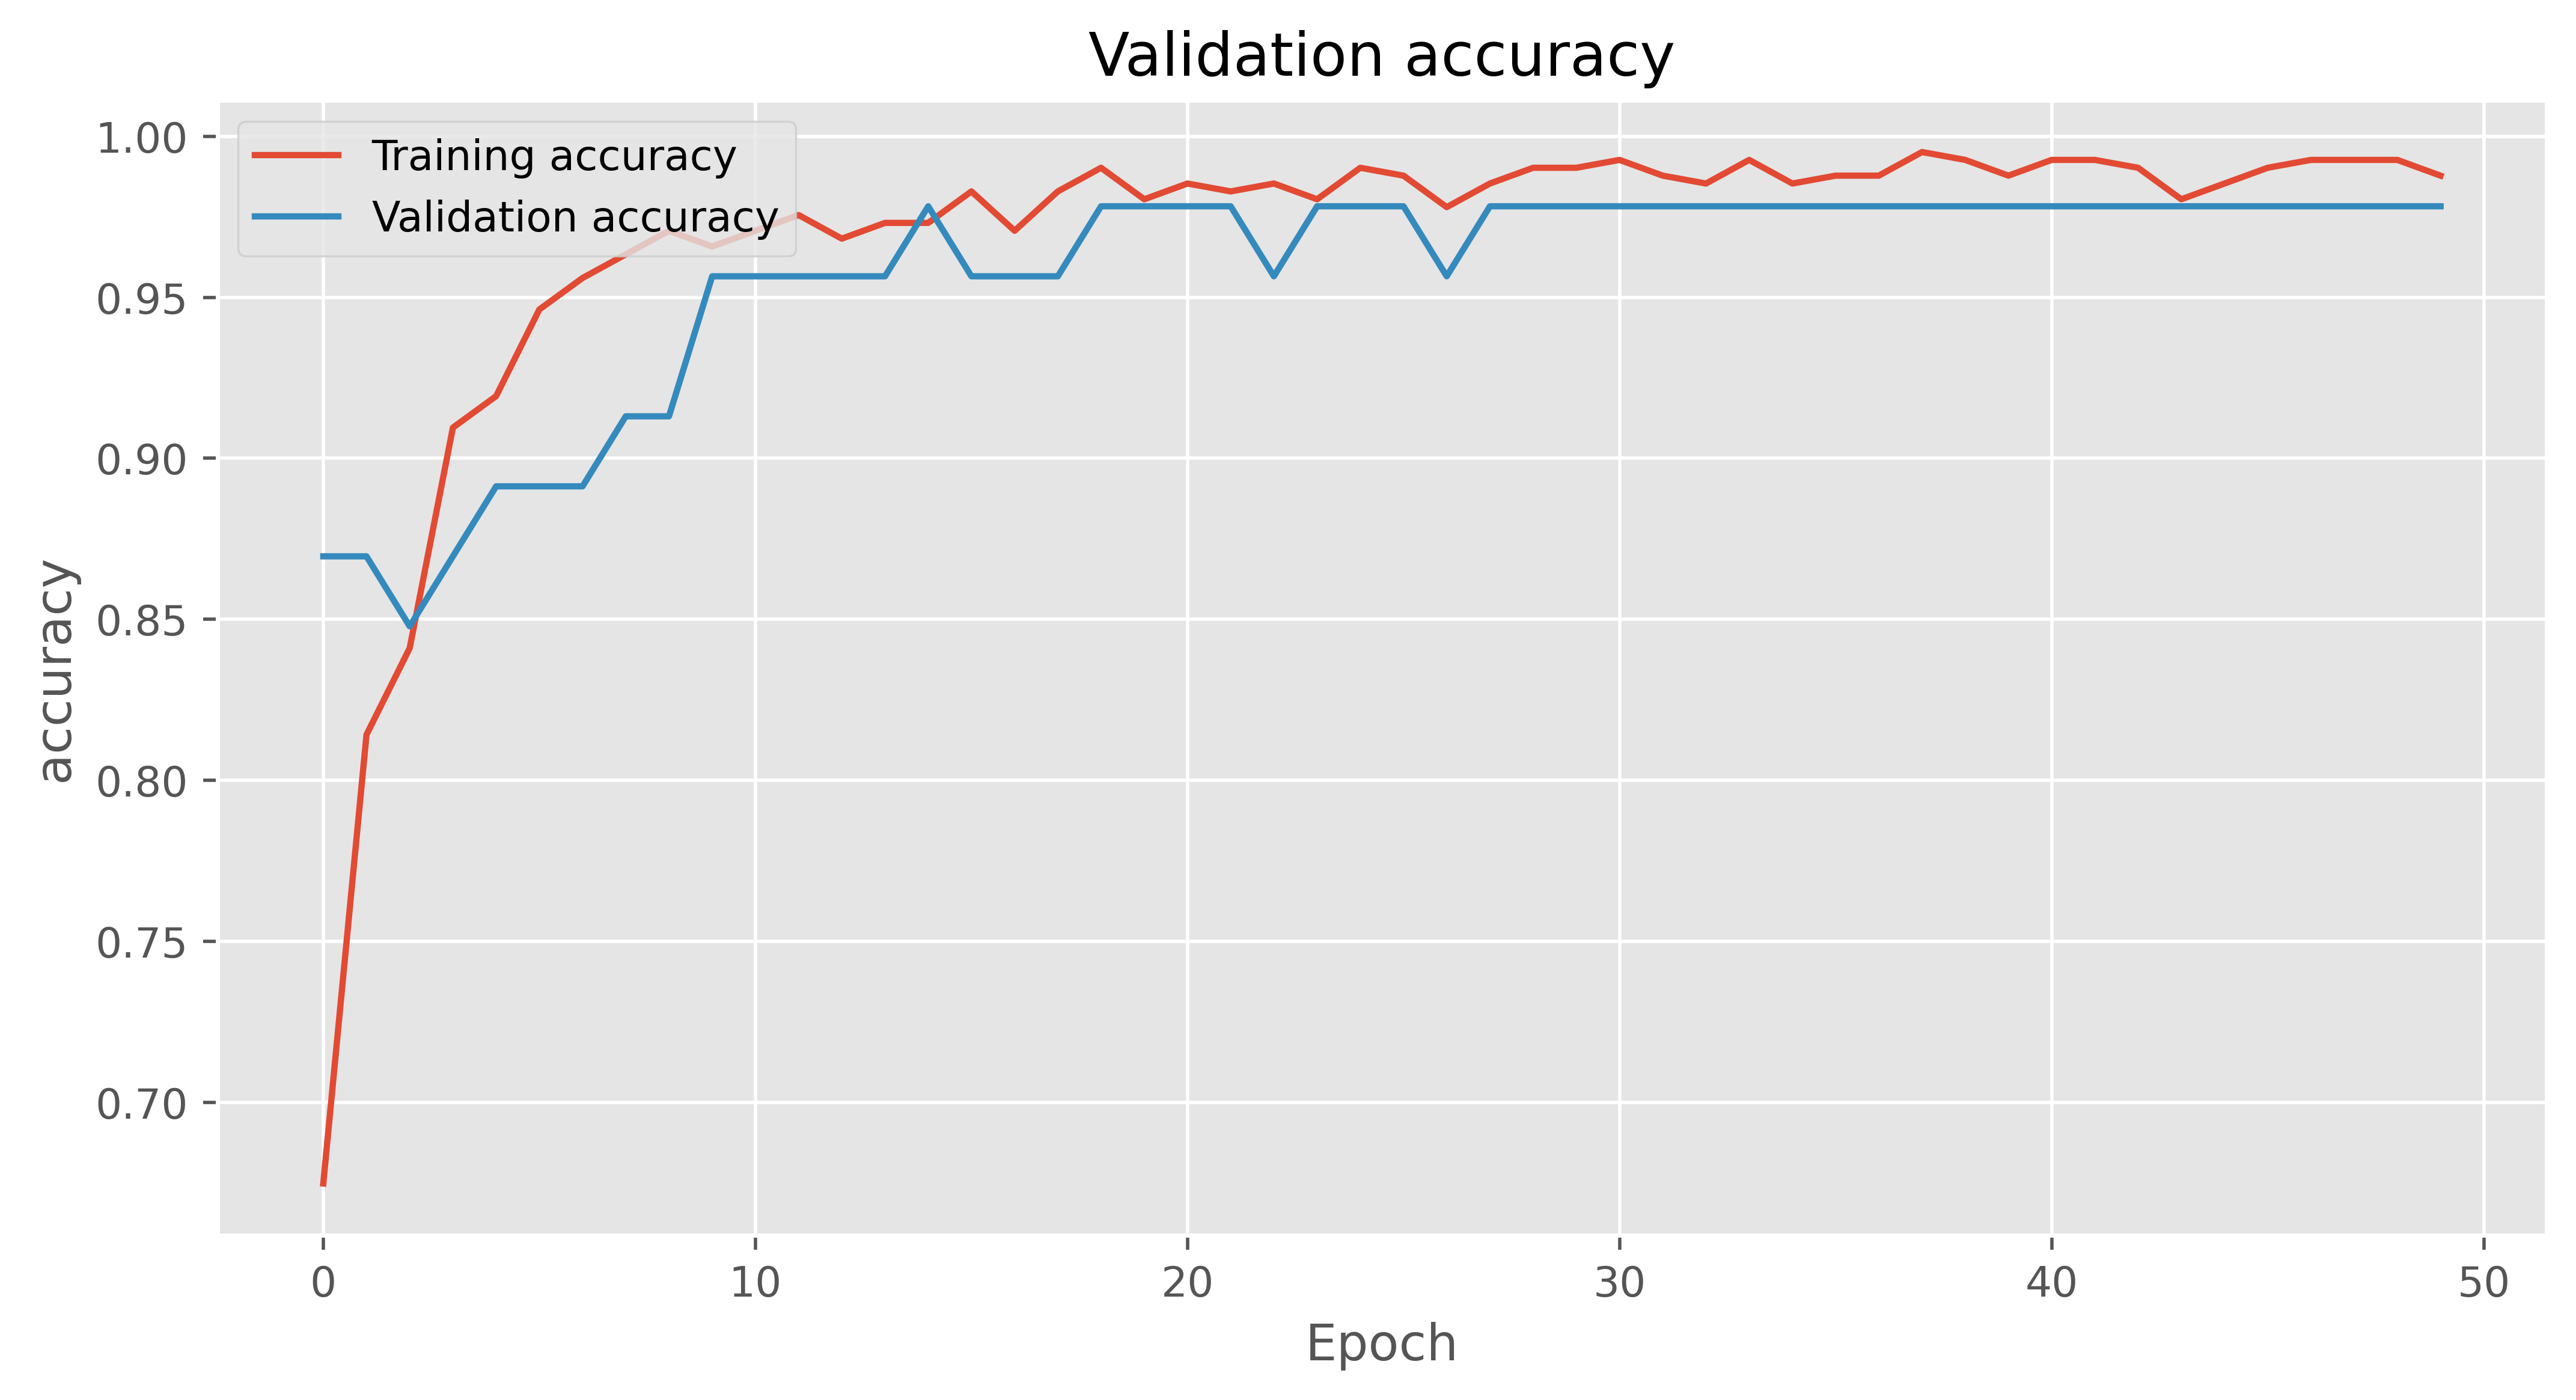

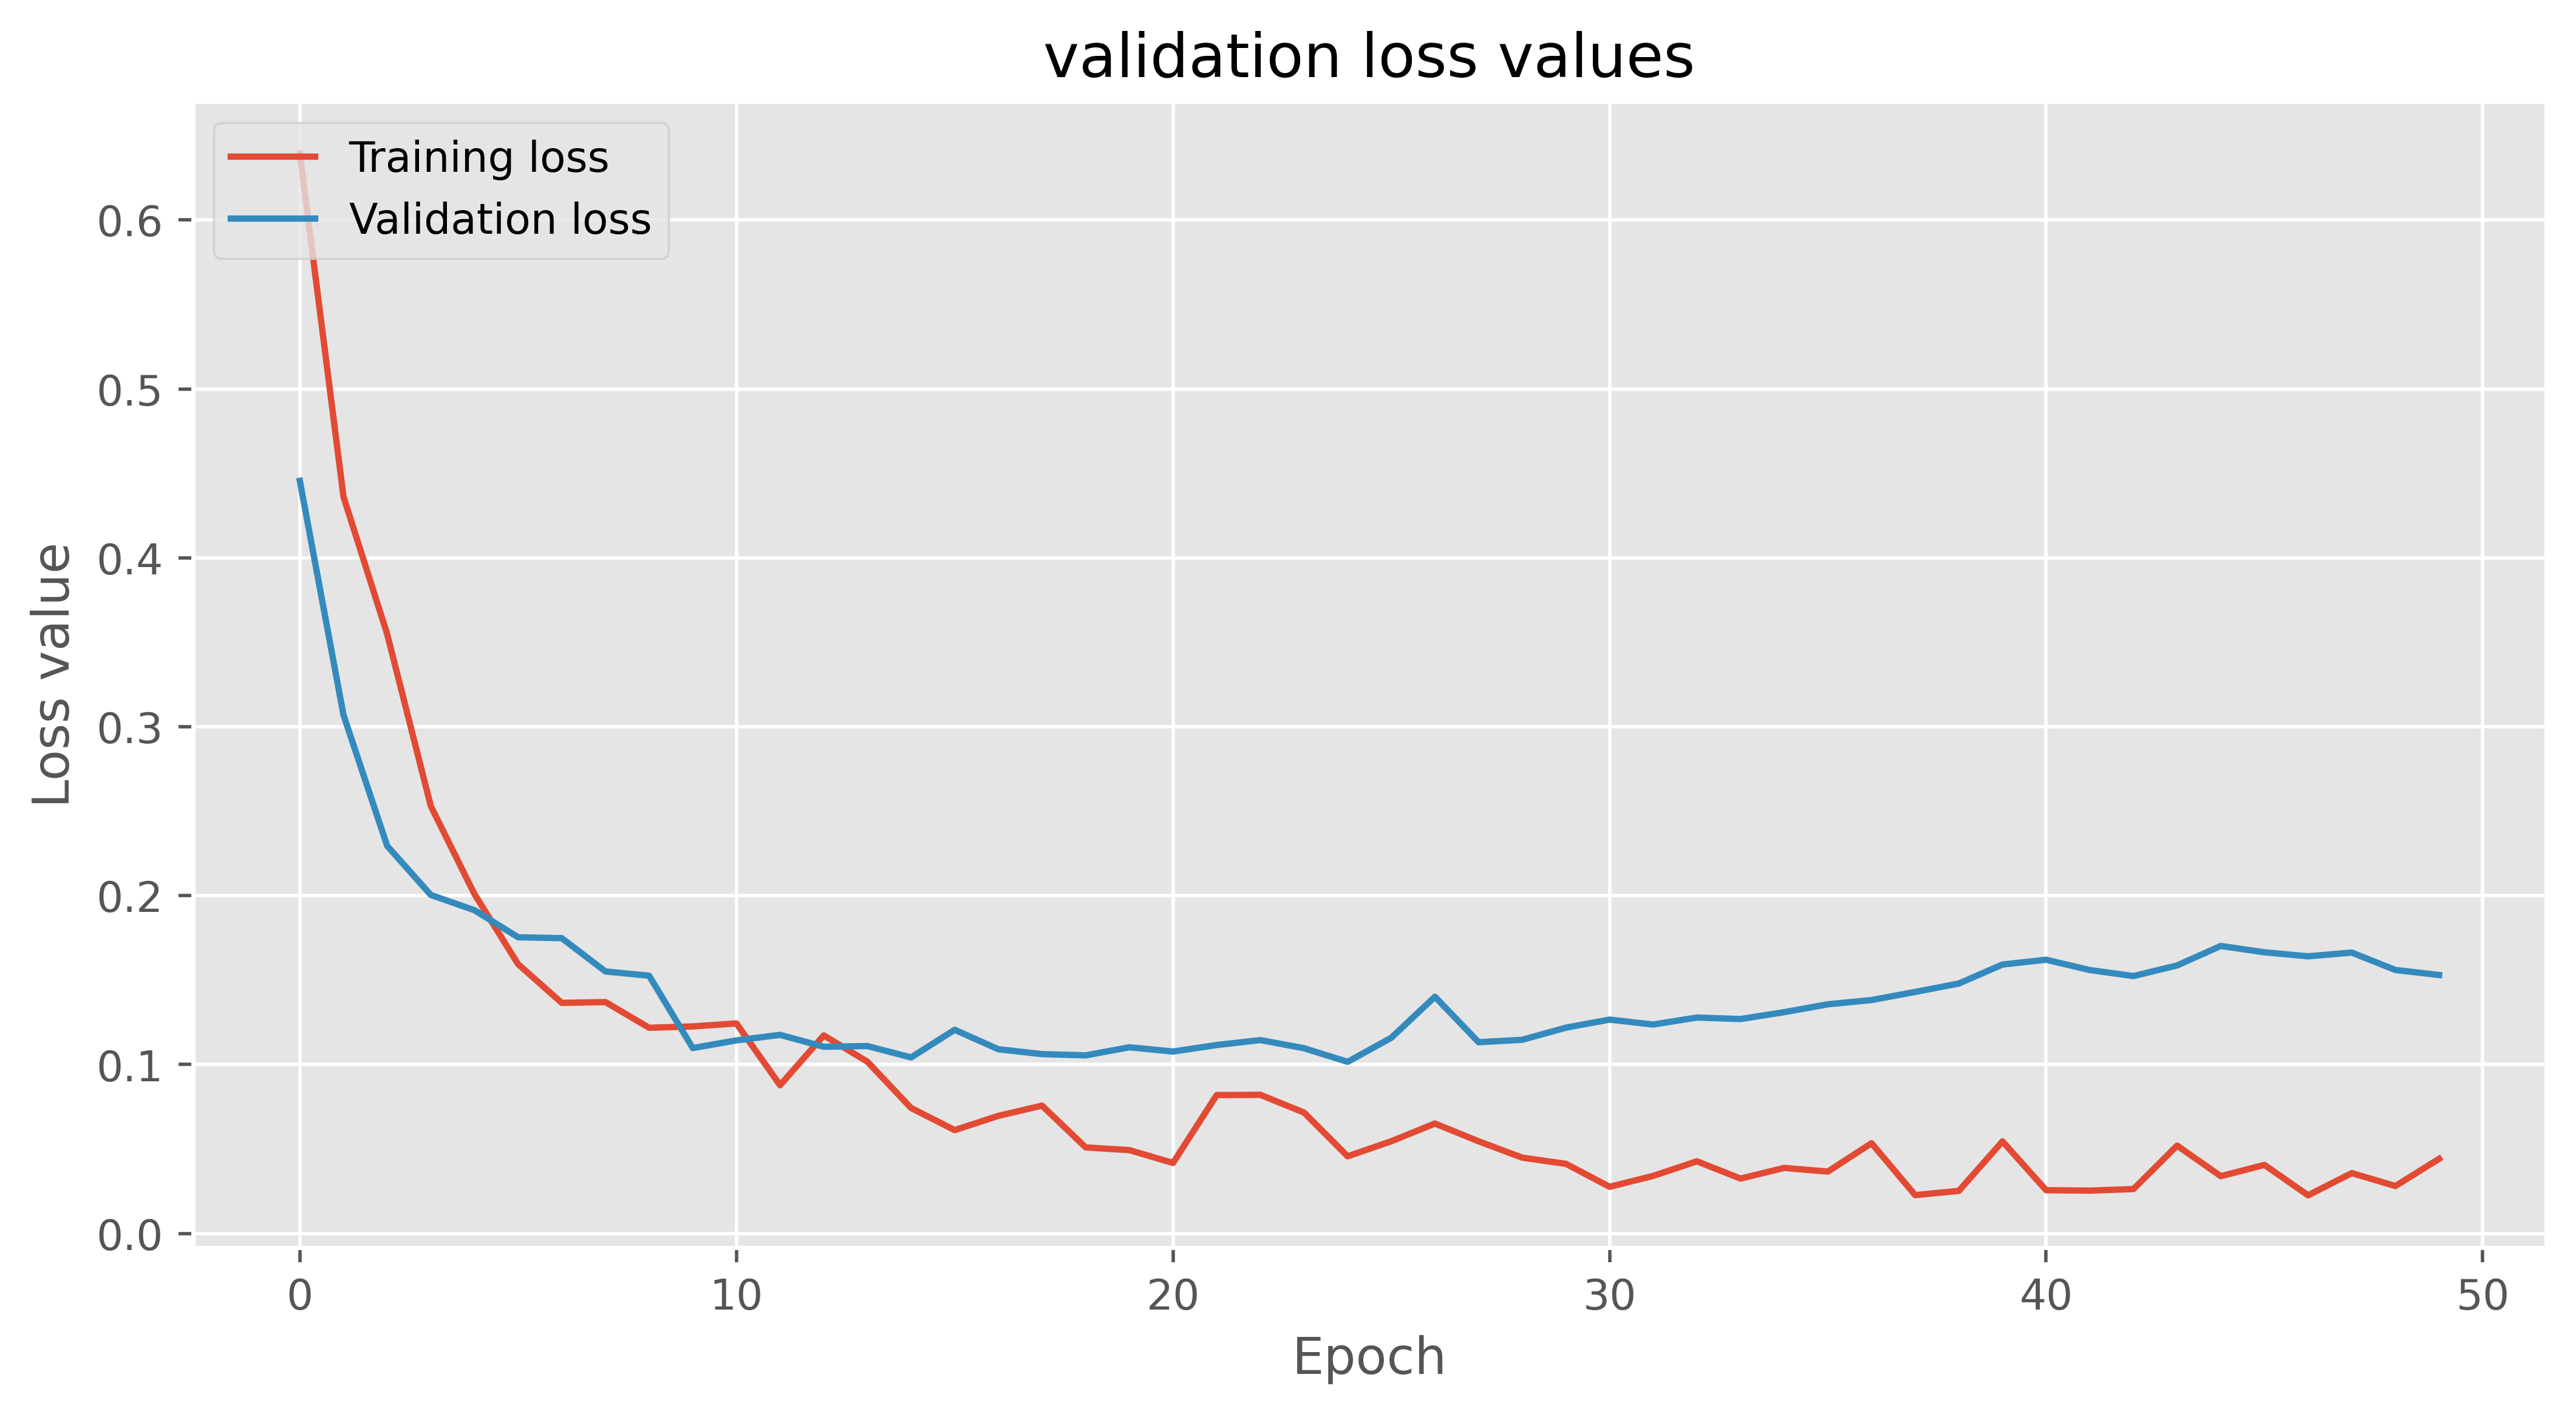

In [427]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [428]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9649


[0.10759974271059036, 0.9649122953414917]

In [429]:
y_pred=model.predict_classes(X_test.values)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [430]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.93      0.95        42\n           1       0.96      0.99      0.97        72\n\n    accuracy                           0.96       114\n   macro avg       0.97      0.96      0.96       114\nweighted avg       0.97      0.96      0.96       114\n'

# LSTM Classifier

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os

<ipython-input-5-41661d777604>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [6]:
data_df =  pd.read_csv("C:/Users/Syed Muqtasid Ali/Downloads/prices-split-adjusted.csv/prices-split-adjusted.csv", index_col = 0)
data_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [7]:
df2 = pd.read_csv("C:/Users/Syed Muqtasid Ali/Downloads/fundamentals.csv/fundamentals.csv")
df2.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [8]:
data_df = data_df[data_df.symbol == 'AAPL']
data_df.drop(['symbol'],1,inplace=True)
data_df.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0


In [9]:
data_df.shape

(1762, 5)

In [10]:
data_df.tail()

,open,close,low,high,volume
date,,,,,
2016-12-23,115.589996,116.519997,115.589996,116.519997,14249500.0
2016-12-27,116.519997,117.260002,116.489998,117.800003,18296900.0
2016-12-28,117.519997,116.760002,116.199997,118.019997,20905900.0
2016-12-29,116.449997,116.730003,116.400002,117.110001,15039500.0
2016-12-30,116.650002,115.820000,115.430000,117.199997,30586300.0


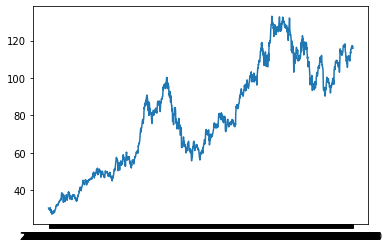

In [11]:
plt.plot(data_df['close'])
plt.show()

In [12]:
data_df['date'] = data_df.index
data_df.head()

,open,close,low,high,volume,date
date,,,,,,
2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0,2010-01-04
2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0,2010-01-05
2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0,2010-01-06
2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0,2010-01-07
2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0,2010-01-08


In [13]:
data_df['date'] = pd.to_datetime(data_df['date'])

In [14]:
data_df.head()

,open,close,low,high,volume,date
date,,,,,,
2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0,2010-01-04
2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0,2010-01-05
2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0,2010-01-06
2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0,2010-01-07
2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0,2010-01-08


In [15]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(data_df['close'].values.reshape(-1, 1))

In [16]:
dataset[0:10]

array([[0.02971784],
       [0.03021854],
       [0.02560389],
       [0.02507612],
       [0.0269707 ],
       [0.02444008],
       [0.02120576],
       [0.02517085],
       [0.02351986],
       [0.0187834 ]])

In [17]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1233 529


In [18]:
print(len(data_df))
print(1233 + 529)

1762
1762


In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
x_train, y_train = create_dataset(train, look_back=15)
x_test, y_test = create_dataset(test, look_back=15)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1217, 15)
(1217,)
(513, 15)
(513,)


In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1217, 1, 15)
(1217,)
(513, 1, 15)
(513,)


# 

# BI-LSTM classifier

In [44]:
import pandas as pd

In [45]:
df=pd.read_csv('C:/Users/Syed Muqtasid Ali/Downloads/train.csv/train.csv')

In [46]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [47]:
###Drop Nan Values
df=df.dropna()

In [48]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [49]:
## Get the Dependent features
y=df['label']

In [50]:
y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [51]:
X.shape

(18285, 4)

In [52]:
y.shape

(18285,)

In [53]:
import tensorflow as tf

In [54]:
tf.__version__

'2.3.0'

In [55]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [56]:
### Vocabulary size
voc_size=5000

In [57]:
### Vocabulary size
voc_size=5000

In [59]:
messages=X.copy()

In [60]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [61]:
messages.reset_index(inplace=True)

In [62]:
import nltk
import re
from nltk.corpus import stopwords

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Syed Muqtasid
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [64]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066


3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721


5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376


6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020


8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676


10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
1027

11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
1165

12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
1303

14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
1441

15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
1577

16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
1716

In [65]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [66]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

NameError: name 'onehot_repr' is not defined

In [67]:
embedded_docs[0]

NameError: name 'embedded_docs' is not defined

In [68]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

NotImplementedError: Cannot convert a symbolic Tensor (lstm_9/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [69]:
## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

NotImplementedError: Cannot convert a symbolic Tensor (bidirectional_1/forward_lstm_10/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [70]:
len(embedded_docs),y.shape

NameError: name 'embedded_docs' is not defined

In [71]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

NameError: name 'embedded_docs' is not defined

In [72]:
X_final.shape,y_final.shape

NameError: name 'X_final' is not defined

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

NameError: name 'X_final' is not defined

In [74]:
### Finally Training
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

NameError: name 'X_train' is not defined

In [75]:
y_pred1=model1.predict_classes(X_test)

NameError: name 'X_test' is not defined

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
confusion_matrix(y_test,y_pred1)

NameError: name 'y_pred1' is not defined

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

NameError: name 'y_pred1' is not defined

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

NameError: name 'y_pred1' is not defined

In [ ]:
precision    recall  f1-score   support

           0       0.93      0.90      0.92      3419
           1       0.88      0.91      0.89      2616

    accuracy                           0.91      6035
   macro avg       0.90      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035
